# SPSA vs. Other optimization methods

In [1]:
# have to be run only once to have the project root directory as CWD
import os
os.chdir("..")

In [2]:
# Imports
from GB_ZO.algorithms import *
#import mountain_car.moutain_car as rl # error when important gym
import GB_ZO.linear_regression.linear_regression as lr
import GB_ZO.linear_regression.plot as lr_plot
import GB_ZO.kmeans_soft_clustering.kmeans as kmeans
import GB_ZO.kmeans_soft_clustering.plot as kmeans_plot

%load_ext autoreload 
%autoreload 2

Creating 5 blobs


## 1. Linear Regression 

Using SPSA
[2. 3.]


Performing gradient descent: 100%|██████████| 1000/1000 [00:00<00:00, 8818.12iteration/s]

Final parameters (spsa):
Loss: 0.155995
Param Error: 0.093386


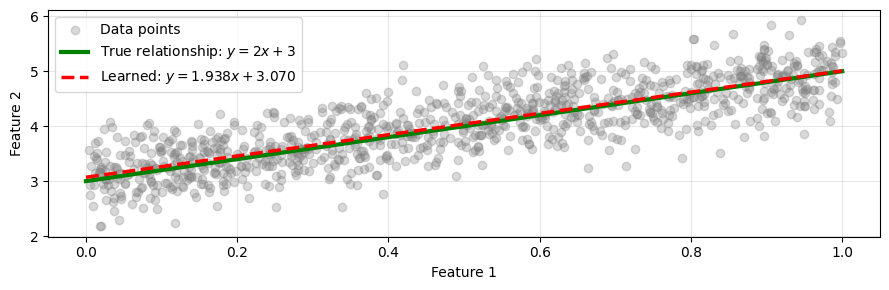

{'multi-point': 'GB_ZO/linear_regression/results/multi-point_1D.json', 'spsa': 'GB_ZO/linear_regression/results/spsa_1D.json', 'analytical': 'GB_ZO/linear_regression/results/analytical_1D.json'}
dict_keys(['multi-point', 'spsa', 'analytical'])


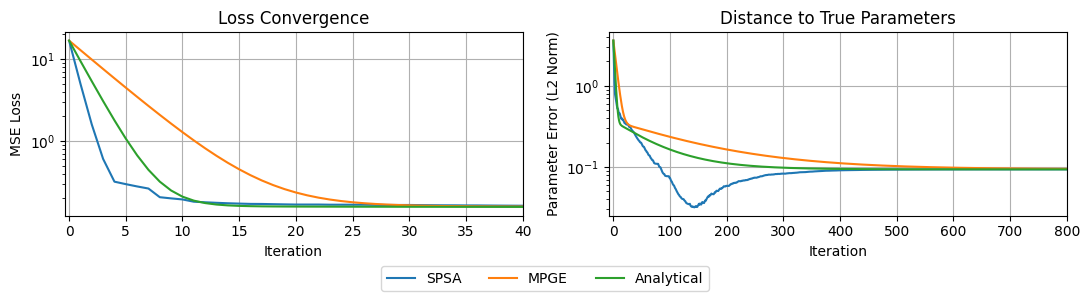

In [3]:
# METHOD AND PARAMETERS HAVE TO BE CHANGED INSIDE THE RELEVANT SCRIPTS
# getting results
lr.main()
# plotting them
lr_plot.main()

## 2. K-Means

Using SPSA
Problem shape is (10,)


Performing gradient descent: 100%|██████████| 10000/10000 [00:05<00:00, 1768.44iteration/s]


Final cluster centers:
[[ -1.34669278   0.45766023]
 [ -6.38168963  -8.1594254 ]
 [-10.84419637   7.87903746]
 [  5.21808511   3.17566613]
 [ -0.56346052  11.1024415 ]]
Final objective value: 4099.9383


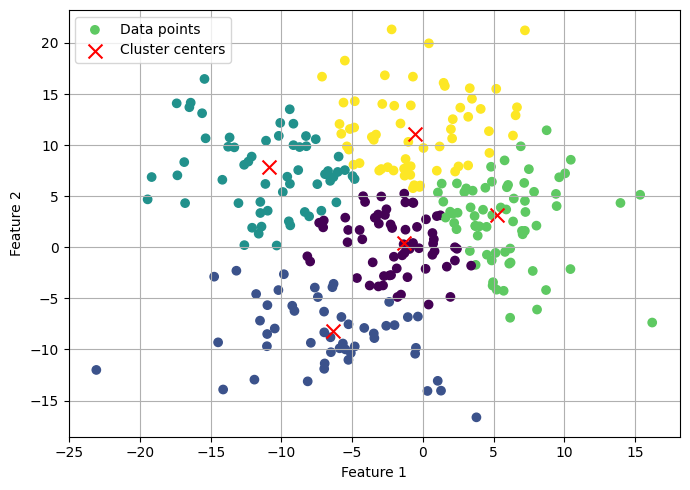

Computing the loss: 100%|██████████| 10001/10001 [00:02<00:00, 3722.17x/s]


Final loss: 4099.938264329006


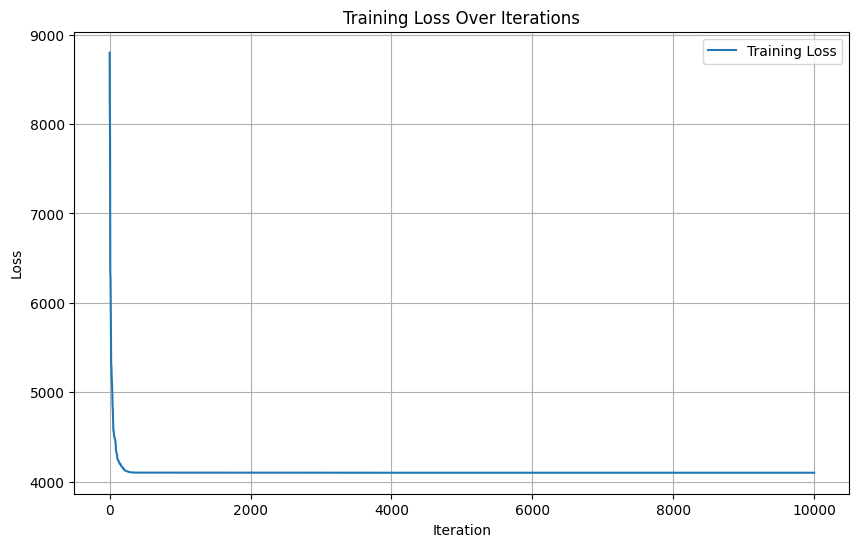

{'spsa': 'GB_ZO/kmeans_soft_clustering/results/spsa_2D.json', 'analytical': 'GB_ZO/kmeans_soft_clustering/results/analytical_2D.json', 'multi-point': 'GB_ZO/kmeans_soft_clustering/results/multi-point_2D.json'}
dict_keys(['spsa', 'analytical', 'multi-point'])


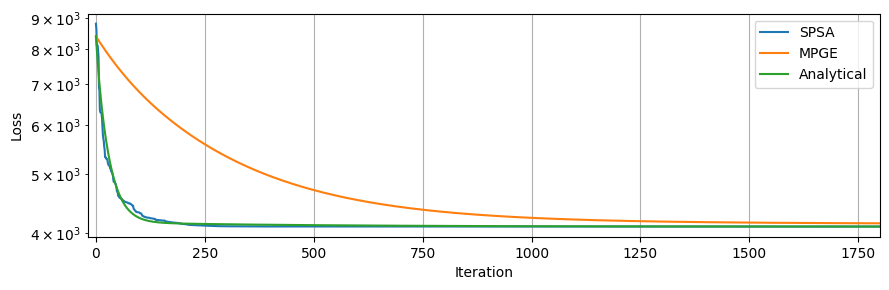

In [4]:
# METHOD AND PARAMETERS HAVE TO BE CHANGED INSIDE THE RELEVANT SCRIPTS
# getting results
kmeans.main()
# plotting them
kmeans_plot.main()

## 3. Reinforcement Learning (Mountain Car)

In [32]:
net = rl.MLPPolicy()
num_params = net.get_params().size
num_params

51

This means that Multipoint Gradient Estimator takes about ~51x longer than SPSA to estimate the gradient!

Let's perform a grid-search on the hyperparameters of SPSA. (Unfortunately, MPGE never reaches the goal no matter the hyperparameters.)

In [33]:
iterations = 500
alpha_list = [1.0, 0.5, 0.25]
K_list = [10.0, 5.0, 2.5]

spsa_histories, spsa_best_params = rl.grid_search(iterations, spsa_gradient, alpha_list, K_list)

--- GRID SEARCH ---
--------------------------------------------

### Training for alpha=1.0, K=10.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.96
Step 2 - New best reward: -184.45
Step 8 - New best reward: -180.83
Step 10 - New best reward: -166.79
Step 26 - New best reward: -165.26
Step 88 - New best reward: -162.38
Step 161 - New best reward: -157.03
Step 202 - New best reward: -153.00
Step 204 - New best reward: -151.64


--------------------------------------------

### Training for alpha=1.0, K=5.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.74
Step 1 - New best reward: -188.52
Step 2 - New best reward: -181.26
Step 14 - New best reward: -174.49
Step 19 - New best reward: -172.52
Step 60 - New best reward: -170.55
Step 74 - New best reward: -168.29
Step 77 - New best reward: -162.51
Step 86 - New best reward: -160.59
Step 88 - New best reward: -157.91
Step 103 - New best reward: -154.51
Step 202 - New best reward: -151.81
Step 204 - New best reward: -150.51
Step 239 - New best reward: -149.57
Step 339 - New best reward: -148.24
Step 347 - New best reward: -146.68
Step 352 - New best reward: -28.98
Step 358 - New best reward:  4.81
Step 367 - New best reward:  6.84
Step 368 - New best reward:  8.08
Step 424 - New best reward:  11.48


--------------------------------------------

### Training for alpha=1.0, K=2.5 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 2 - New best reward: -181.26
Step 11 - New best reward: -179.38
Step 60 - New best reward: -176.44


--------------------------------------------

### Training for alpha=0.5, K=10.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.41
Step 3 - New best reward: -186.96
Step 4 - New best reward: -186.55
Step 12 - New best reward: -185.36
Step 17 - New best reward: -183.40


--------------------------------------------

### Training for alpha=0.5, K=5.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.59
Step 3 - New best reward: -186.91
Step 4 - New best reward: -184.10
Step 8 - New best reward: -183.91
Step 9 - New best reward: -183.54
Step 10 - New best reward: -172.50
Step 12 - New best reward: -169.17
Step 28 - New best reward: -168.97
Step 33 - New best reward: -164.61
Step 37 - New best reward: -157.96
Step 46 - New best reward: -157.27
Step 53 - New best reward: -156.18
Step 59 - New best reward: -15.94
Step 60 - New best reward: -11.10
Step 61 - New best reward: -5.28
Step 71 - New best reward: -2.07
Step 77 - New best reward:  15.51
Step 81 - New best reward:  16.20
Step 82 - New best reward:  16.56
Step 86 - New best reward:  19.01
Step 87 - New best reward:  19.37
Step 93 - New best reward:  29.87
Step 371 - New best reward:  30.83


--------------------------------------------

### Training for alpha=0.5, K=2.5 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.75
Step 2 - New best reward: -181.26
Step 11 - New best reward: -179.38
Step 60 - New best reward: -176.44


--------------------------------------------

### Training for alpha=0.25, K=10.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.41
Step 3 - New best reward: -187.05
Step 4 - New best reward: -186.57
Step 12 - New best reward: -185.51
Step 17 - New best reward: -182.51
Step 213 - New best reward: -182.46


--------------------------------------------

### Training for alpha=0.25, K=5.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.41
Step 3 - New best reward: -187.05
Step 4 - New best reward: -186.57
Step 12 - New best reward: -185.51
Step 17 - New best reward: -182.62


--------------------------------------------

### Training for alpha=0.25, K=2.5 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.41
Step 2 - New best reward: -181.26
Step 11 - New best reward: -179.38
Step 49 - New best reward: -151.21
Step 56 - New best reward: -149.96
Step 59 - New best reward: -31.38
Step 67 - New best reward: -29.04
Step 78 - New best reward: -24.45
Step 98 - New best reward: -11.52
Step 99 - New best reward: -4.72
Step 313 - New best reward:  1.05
Step 315 - New best reward:  1.39
Step 335 - New best reward:  1.62
Step 347 - New best reward:  13.62
Step 383 - New best reward:  14.52
Step 439 - New best reward:  14.58


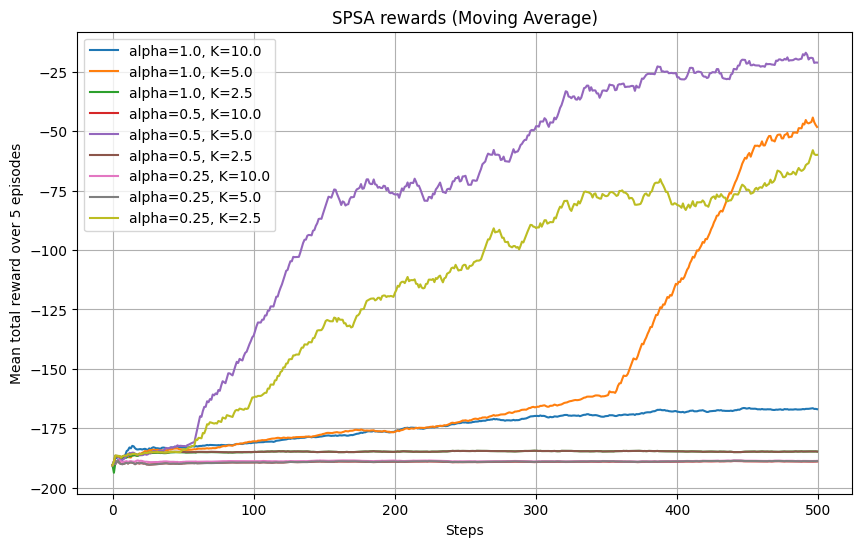

In [34]:
# Plot the results
rl.plot_grid_search(spsa_histories, 'SPSA rewards (Moving Average)', 100)

Unfortunately, despite many attempts, MPGE never learns to reach the goal no matter the hyperparameters used. Run a (time-consuming) grid-search with MPGE to notice that. MPGE only learns to go in one direction.

Here we still try with reasonable parameters alpha=0.5 and K=1.0

In [35]:
iterations = 100 # Takes about the same amount of time as 51 * 100 = 5100 SPSA iterations
alpha = 0.5
K = 1.0

In [36]:
print("Training with Multipoint Gradient Estimator...")
multi_history, multi_best_params = rl.train(multipoint_gradient_estimator, iterations=iterations, alpha_init=alpha, K_init=K)

Training with Multipoint Gradient Estimator...


  0%|          | 0/100 [00:00<?, ?it/s]

Step 0 - New best reward: -186.05
Step 10 - New best reward: -185.72
Step 51 - New best reward: -185.48
Step 60 - New best reward: -184.46


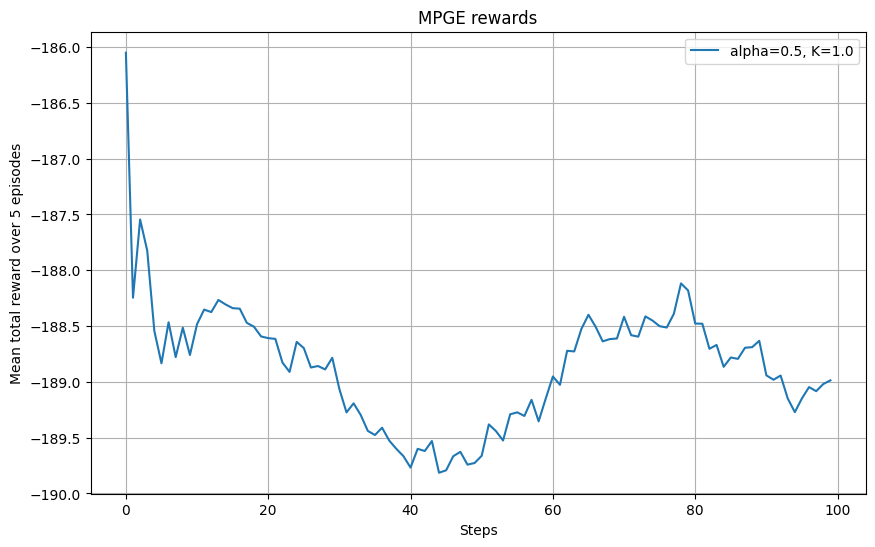

In [37]:
rl.plot_grid_search({(alpha, K): multi_history}, 'MPGE rewards', window_size=20)

In [38]:
# Best SPSA policy visualization
rl.visualize_policy(spsa_best_params[(0.5, 5.0)])

In [39]:
# Best Multipoint Gradient Estimator policy visualization
rl.visualize_policy(multi_best_params)

## 4. Architecture Optimization

In [40]:
# Training and plots